## In this, we'll work on indicators of chronic diseases. Public health experts and policymakers can access universally defined state-level data for chronic diseases and risk factors that have a significant impact on public health by using the chronic disease indicators (CDI) set of surveillance indicators. 124 indicators that were defined by consensus and that allow states and territories and big metropolitan areas to universally define, collect, and report chronic disease data that are crucial to public health practice and available for states, territories, and large metropolitan areas.

## We are going to analyze the US population health based on 20 years data
### What are the indicators by specific topic(disease)?
### What are the major chronic diseases prevalent?
### What are the correlation between disease and different indicators?


## Data Access and Formats

#### Load credentials file to access the AWS services

In [1]:
from json import load
credentials = load(open('aws_creds.json'))

In [2]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

#### Function to read the given S3 object from the given S3 bucket

In [3]:
import pandas as pd
from boto3 import client
import json
##Function to load data from S3 file into dataframe
def load_from_s3(key, bucket):
    s3_client = client('s3',
                 aws_access_key_id=credentials['AWS_KEY'],
                 aws_secret_access_key=credentials['AWS_SECRET']
                )
    return s3_client.get_object(Bucket=bucket, Key=key)["Body"].read().decode()

#### Get location json file from s3 and load into pandas dataframe using "load_from_s3"

In [4]:
location_df = pd.json_normalize(json.loads(load_from_s3('location_data.json','yeshuproject')))

In [5]:
location_df.head()

,LocationAbbr,LocationDesc,GeoLocation,LocationID
0,AK,Alaska,POINT (-147.72205903599973 64.84507995700051),2
1,AL,Alabama,POINT (-86.63186076199969 32.84057112200048),1
2,AR,Arkansas,POINT (-92.27449074299966 34.74865012400045),5
3,AZ,Arizona,POINT (-111.76381127699972 34.865970280000454),4
4,CA,California,POINT (-120.99999953799971 37.63864012300047),6


In [6]:
location_df.shape

(55, 4)

## Data Merging

#### Load US Chronic Disease data from 2 files, 2000-2010 and 2011 to 2021

In [7]:
us_cdi_data_1 = pd.read_csv('US_CDI_2000_2010.csv',low_memory=False)
us_cdi_data_2 = pd.read_csv('US_CDI_2011_2022.csv',low_memory=False)

#### Function to merge dataframes vertically

In [8]:
def merge_data(df1,df2,is_vertical_merge,is_left_join,left_join_col_name,right_join_col_name):
    if is_vertical_merge:
        return pd.concat([df1, df2], ignore_index=True)
    else:
        if is_left_join:
            return pd.merge(df1, df2, left_on=left_join_col_name, right_on=right_join_col_name, 
                            how='left').drop(right_join_col_name, axis=1)
        else:
            return pd.merge(df1, df2, left_on=left_join_col_name, right_on=right_join_col_name, 
                            how='right').drop(left_join_col_name, axis=1)
        

## Merge #1

#### Merge the data to combine Chronic Indicator data from 2010 to 2021

In [9]:
us_cdi_data_merged = merge_data(us_cdi_data_1,us_cdi_data_2,True,None,None,None)

In [10]:
us_cdi_data_merged.head()

,YearStart,YearEnd,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,DataValue,DataValueAlt,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
0,2010,2010,NVSS,Alcohol,Chronic liver disease mortality,NaN,NaN,Number,70,70.0,...,2,ALC,ALC6_0,NMBR,OVERALL,OVR,NaN,NaN,NaN,NaN
1,2010,2010,NVSS,Cardiovascular Disease,Mortality from diseases of the heart,NaN,NaN,Number,707,707.0,...,2,CVD,CVD1_2,NMBR,OVERALL,OVR,NaN,NaN,NaN,NaN
2,2010,2010,NVSS,Cardiovascular Disease,Mortality from heart failure,NaN,"cases per 100,000",Crude Rate,41.3,41.3,...,2,CVD,CVD1_4,CRDRATE,OVERALL,OVR,NaN,NaN,NaN,NaN
3,2010,2010,SEDD; SID,Diabetes,Amputation of a lower extremity attributable t...,NaN,NaN,Number,NaN,NaN,...,2,DIA,DIA4_0,NMBR,OVERALL,OVR,NaN,NaN,NaN,NaN
4,2010,2010,"Birth Certificate, NVSS",Diabetes,Prevalence of gestational diabetes,NaN,%,Prevalence,4.5,4.5,...,1,DIA,DIA3_2,PREV,OVERALL,OVR,NaN,NaN,NaN,NaN


In [11]:
us_cdi_data_merged.shape

(1048575, 31)

## Merge #2

#### Merge the CDI data and Location data to get the geographical insights from the data
#### Join on LocationId on CDI data and Location Data

In [12]:
us_cdi_data_loc_merged = merge_data(us_cdi_data_merged,location_df,False,True,'LocationID','LocationID')

In [13]:
us_cdi_data_loc_merged.head()

,YearStart,YearEnd,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,DataValue,DataValueAlt,...,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3,LocationAbbr,LocationDesc,GeoLocation
0,2010,2010,NVSS,Alcohol,Chronic liver disease mortality,NaN,NaN,Number,70,70.0,...,NMBR,OVERALL,OVR,NaN,NaN,NaN,NaN,AK,Alaska,POINT (-147.72205903599973 64.84507995700051)
1,2010,2010,NVSS,Cardiovascular Disease,Mortality from diseases of the heart,NaN,NaN,Number,707,707.0,...,NMBR,OVERALL,OVR,NaN,NaN,NaN,NaN,AK,Alaska,POINT (-147.72205903599973 64.84507995700051)
2,2010,2010,NVSS,Cardiovascular Disease,Mortality from heart failure,NaN,"cases per 100,000",Crude Rate,41.3,41.3,...,CRDRATE,OVERALL,OVR,NaN,NaN,NaN,NaN,AK,Alaska,POINT (-147.72205903599973 64.84507995700051)
3,2010,2010,SEDD; SID,Diabetes,Amputation of a lower extremity attributable t...,NaN,NaN,Number,NaN,NaN,...,NMBR,OVERALL,OVR,NaN,NaN,NaN,NaN,AK,Alaska,POINT (-147.72205903599973 64.84507995700051)
4,2010,2010,"Birth Certificate, NVSS",Diabetes,Prevalence of gestational diabetes,NaN,%,Prevalence,4.5,4.5,...,PREV,OVERALL,OVR,NaN,NaN,NaN,NaN,AL,Alabama,POINT (-86.63186076199969 32.84057112200048)


In [14]:
us_cdi_data_loc_merged.columns

Index(['YearStart', 'YearEnd', 'DataSource', 'Topic', 'Question', 'Response',
       'DataValueUnit', 'DataValueType', 'DataValue', 'DataValueAlt',
       'DataValueFootnoteSymbol', 'DatavalueFootnote', 'LowConfidenceLimit',
       'HighConfidenceLimit', 'StratificationCategory1', 'Stratification1',
       'StratificationCategory2', 'Stratification2', 'StratificationCategory3',
       'Stratification3', 'ResponseID', 'TopicID', 'QuestionID',
       'DataValueTypeID', 'StratificationCategoryID1', 'StratificationID1',
       'StratificationCategoryID2', 'StratificationID2',
       'StratificationCategoryID3', 'StratificationID3', 'LocationAbbr',
       'LocationDesc', 'GeoLocation'],
      dtype='object')

In [15]:
us_cdi_data_loc_merged.shape

(1048575, 33)

In [16]:
us_cdi_data_loc_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048575 entries, 0 to 1048574
Data columns (total 33 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   YearStart                  1048575 non-null  int64  
 1   YearEnd                    1048575 non-null  int64  
 2   DataSource                 1048575 non-null  object 
 3   Topic                      1048575 non-null  object 
 4   Question                   1048575 non-null  object 
 5   Response                   0 non-null        float64
 6   DataValueUnit              909185 non-null   object 
 7   DataValueType              1048575 non-null  object 
 8   DataValue                  707688 non-null   object 
 9   DataValueAlt               705645 non-null   float64
 10  DataValueFootnoteSymbol    354120 non-null   object 
 11  DatavalueFootnote          354120 non-null   object 
 12  LowConfidenceLimit         595783 non-null   float64
 13  HighConfiden

In [17]:
us_cdi_data_loc_merged.describe()

,YearStart,YearEnd,Response,DataValueAlt,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory2,Stratification2,StratificationCategory3,Stratification3,ResponseID,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
count,1.048575e+06,1.048575e+06,0.0,7.056450e+05,595783.000000,595783.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,2.014507e+03,2.015042e+03,NaN,1.059189e+03,52.000890,63.946925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,2.977912e+00,2.641382e+00,NaN,1.956192e+04,90.024714,101.046265,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2.001000e+03,2.001000e+03,NaN,0.000000e+00,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2.012000e+03,2.013000e+03,NaN,1.730000e+01,11.800000,17.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2.014000e+03,2.015000e+03,NaN,4.120000e+01,29.300000,42.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2.017000e+03,2.017000e+03,NaN,7.780000e+01,57.400000,72.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,2.021000e+03,2.021000e+03,NaN,2.925456e+06,1615.700000,2137.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Transformation

### Transformation #1 - Drop all the columns where >90% values are missing 

In [18]:
def drop_cols_with_na(df,perc):
    return df.dropna(axis=1,thresh=int(((100-perc)/100)*df.shape[0] + 1))

In [19]:
us_cdi_data_loc_merged_na_dropped = drop_cols_with_na(us_cdi_data_loc_merged,90.0)

In [20]:
us_cdi_data_loc_merged_na_dropped.shape

(1048575, 23)

In [21]:
us_cdi_data_loc_merged_na_dropped.columns

Index(['YearStart', 'YearEnd', 'DataSource', 'Topic', 'Question',
       'DataValueUnit', 'DataValueType', 'DataValue', 'DataValueAlt',
       'DataValueFootnoteSymbol', 'DatavalueFootnote', 'LowConfidenceLimit',
       'HighConfidenceLimit', 'StratificationCategory1', 'Stratification1',
       'TopicID', 'QuestionID', 'DataValueTypeID', 'StratificationCategoryID1',
       'StratificationID1', 'LocationAbbr', 'LocationDesc', 'GeoLocation'],
      dtype='object')

In [22]:
us_cdi_data_loc_merged_na_dropped.head()

,YearStart,YearEnd,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,DataValueAlt,DataValueFootnoteSymbol,...,StratificationCategory1,Stratification1,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,LocationAbbr,LocationDesc,GeoLocation
0,2010,2010,NVSS,Alcohol,Chronic liver disease mortality,NaN,Number,70,70.0,NaN,...,Overall,Overall,ALC,ALC6_0,NMBR,OVERALL,OVR,AK,Alaska,POINT (-147.72205903599973 64.84507995700051)
1,2010,2010,NVSS,Cardiovascular Disease,Mortality from diseases of the heart,NaN,Number,707,707.0,NaN,...,Overall,Overall,CVD,CVD1_2,NMBR,OVERALL,OVR,AK,Alaska,POINT (-147.72205903599973 64.84507995700051)
2,2010,2010,NVSS,Cardiovascular Disease,Mortality from heart failure,"cases per 100,000",Crude Rate,41.3,41.3,NaN,...,Overall,Overall,CVD,CVD1_4,CRDRATE,OVERALL,OVR,AK,Alaska,POINT (-147.72205903599973 64.84507995700051)
3,2010,2010,SEDD; SID,Diabetes,Amputation of a lower extremity attributable t...,NaN,Number,NaN,NaN,-,...,Overall,Overall,DIA,DIA4_0,NMBR,OVERALL,OVR,AK,Alaska,POINT (-147.72205903599973 64.84507995700051)
4,2010,2010,"Birth Certificate, NVSS",Diabetes,Prevalence of gestational diabetes,%,Prevalence,4.5,4.5,NaN,...,Overall,Overall,DIA,DIA3_2,PREV,OVERALL,OVR,AL,Alabama,POINT (-86.63186076199969 32.84057112200048)


In [23]:
us_cdi_data_loc_merged_na_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048575 entries, 0 to 1048574
Data columns (total 23 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   YearStart                  1048575 non-null  int64  
 1   YearEnd                    1048575 non-null  int64  
 2   DataSource                 1048575 non-null  object 
 3   Topic                      1048575 non-null  object 
 4   Question                   1048575 non-null  object 
 5   DataValueUnit              909185 non-null   object 
 6   DataValueType              1048575 non-null  object 
 7   DataValue                  707688 non-null   object 
 8   DataValueAlt               705645 non-null   float64
 9   DataValueFootnoteSymbol    354120 non-null   object 
 10  DatavalueFootnote          354120 non-null   object 
 11  LowConfidenceLimit         595783 non-null   float64
 12  HighConfidenceLimit        595783 non-null   float64
 13  Stratificati

In [24]:
us_cdi_data_loc_merged_na_dropped.isnull().sum(axis = 0)

YearStart                         0
YearEnd                           0
DataSource                        0
Topic                             0
Question                          0
DataValueUnit                139390
DataValueType                     0
DataValue                    340887
DataValueAlt                 342930
DataValueFootnoteSymbol      694455
DatavalueFootnote            694455
LowConfidenceLimit           452792
HighConfidenceLimit          452792
StratificationCategory1           0
Stratification1                   0
TopicID                           0
QuestionID                        0
DataValueTypeID                   0
StratificationCategoryID1         0
StratificationID1                 0
LocationAbbr                      0
LocationDesc                      0
GeoLocation                       0
dtype: int64

### Transformation #2 - Convert columns to float type where needed

In [25]:
import numpy as np
def convert_to_float(r):
    try:
        return float(r)
    except:
        return np.nan

In [26]:
us_cdi_data_loc_merged_na_dropped['DataValue'] = us_cdi_data_loc_merged_na_dropped['DataValue'].apply(convert_to_float)

In [27]:
us_cdi_data_loc_merged_na_dropped.dtypes

YearStart                      int64
YearEnd                        int64
DataSource                    object
Topic                         object
Question                      object
DataValueUnit                 object
DataValueType                 object
DataValue                    float64
DataValueAlt                 float64
DataValueFootnoteSymbol       object
DatavalueFootnote             object
LowConfidenceLimit           float64
HighConfidenceLimit          float64
StratificationCategory1       object
Stratification1               object
TopicID                       object
QuestionID                    object
DataValueTypeID               object
StratificationCategoryID1     object
StratificationID1             object
LocationAbbr                  object
LocationDesc                  object
GeoLocation                   object
dtype: object

In [28]:
us_cdi_data_loc_merged_na_dropped.isnull().sum(axis = 0)

YearStart                         0
YearEnd                           0
DataSource                        0
Topic                             0
Question                          0
DataValueUnit                139390
DataValueType                     0
DataValue                    342930
DataValueAlt                 342930
DataValueFootnoteSymbol      694455
DatavalueFootnote            694455
LowConfidenceLimit           452792
HighConfidenceLimit          452792
StratificationCategory1           0
Stratification1                   0
TopicID                           0
QuestionID                        0
DataValueTypeID                   0
StratificationCategoryID1         0
StratificationID1                 0
LocationAbbr                      0
LocationDesc                      0
GeoLocation                       0
dtype: int64

### Transformation #3,4,5 - Replace NaN float values with mean by Topic (Disease) group for multiple columns
### Convert Year as categorical

In [29]:
def replace_nan_with_mean(df,group_by_col,col_name):
    return df.groupby(group_by_col)[col_name].transform(lambda x: x.fillna(x.mean()))

In [30]:
us_cdi_data_loc_merged_na_dropped["DataValue"] = replace_nan_with_mean(us_cdi_data_loc_merged_na_dropped,'Topic','DataValue')

In [31]:
us_cdi_data_loc_merged_na_dropped["DataValueAlt"] = replace_nan_with_mean(us_cdi_data_loc_merged_na_dropped,'Topic','DataValueAlt')

In [32]:
us_cdi_data_loc_merged_na_dropped["LowConfidenceLimit"] = replace_nan_with_mean(us_cdi_data_loc_merged_na_dropped,'Topic','LowConfidenceLimit')

In [33]:
us_cdi_data_loc_merged_na_dropped["HighConfidenceLimit"] = replace_nan_with_mean(us_cdi_data_loc_merged_na_dropped,'Topic','HighConfidenceLimit')

In [34]:
us_cdi_data_loc_merged_na_dropped['YearStart'] = us_cdi_data_loc_merged_na_dropped['YearStart'].astype('category')

In [35]:
us_cdi_data_loc_merged_na_dropped['YearEnd'] = us_cdi_data_loc_merged_na_dropped['YearEnd'].astype('category')

In [36]:
us_cdi_data_loc_merged_na_dropped.head()

,YearStart,YearEnd,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,DataValueAlt,DataValueFootnoteSymbol,...,StratificationCategory1,Stratification1,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,LocationAbbr,LocationDesc,GeoLocation
0,2010,2010,NVSS,Alcohol,Chronic liver disease mortality,NaN,Number,70.000000,70.000000,NaN,...,Overall,Overall,ALC,ALC6_0,NMBR,OVERALL,OVR,AK,Alaska,POINT (-147.72205903599973 64.84507995700051)
1,2010,2010,NVSS,Cardiovascular Disease,Mortality from diseases of the heart,NaN,Number,707.000000,707.000000,NaN,...,Overall,Overall,CVD,CVD1_2,NMBR,OVERALL,OVR,AK,Alaska,POINT (-147.72205903599973 64.84507995700051)
2,2010,2010,NVSS,Cardiovascular Disease,Mortality from heart failure,"cases per 100,000",Crude Rate,41.300000,41.300000,NaN,...,Overall,Overall,CVD,CVD1_4,CRDRATE,OVERALL,OVR,AK,Alaska,POINT (-147.72205903599973 64.84507995700051)
3,2010,2010,SEDD; SID,Diabetes,Amputation of a lower extremity attributable t...,NaN,Number,1053.969637,1053.969637,-,...,Overall,Overall,DIA,DIA4_0,NMBR,OVERALL,OVR,AK,Alaska,POINT (-147.72205903599973 64.84507995700051)
4,2010,2010,"Birth Certificate, NVSS",Diabetes,Prevalence of gestational diabetes,%,Prevalence,4.500000,4.500000,NaN,...,Overall,Overall,DIA,DIA3_2,PREV,OVERALL,OVR,AL,Alabama,POINT (-86.63186076199969 32.84057112200048)


### Data Aggregation

### Disease distribution across locations

In [37]:
df_group_by_disease_loc = us_cdi_data_loc_merged_na_dropped.groupby(['Topic']).count()

In [38]:
df_group_by_disease_loc

,YearStart,YearEnd,DataSource,Question,DataValueUnit,DataValueType,DataValue,DataValueAlt,DataValueFootnoteSymbol,DatavalueFootnote,...,StratificationCategory1,Stratification1,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,LocationAbbr,LocationDesc,GeoLocation
Topic,,,,,,,,,,,,,,,,,,,,,
Alcohol,57749,57749,57749,57749,53739,57749,57749,57749,20489,20489,...,57749,57749,57749,57749,57749,57749,57749,57749,57749,57749
Arthritis,64816,64816,64816,64816,64816,64816,64816,64816,20137,20137,...,64816,64816,64816,64816,64816,64816,64816,64816,64816,64816
Asthma,71696,71696,71696,71696,63284,71696,71696,71696,37672,37672,...,71696,71696,71696,71696,71696,71696,71696,71696,71696,71696
Cancer,154902,154902,154902,154902,108310,154902,154902,154902,44724,44724,...,154902,154902,154902,154902,154902,154902,154902,154902,154902,154902
Cardiovascular Disease,141038,141038,141038,141038,112941,141038,141038,141038,41288,41288,...,141038,141038,141038,141038,141038,141038,141038,141038,141038,141038
Chronic Kidney Disease,22118,22118,22118,22118,18437,22118,22118,22118,5580,5580,...,22118,22118,22118,22118,22118,22118,22118,22118,22118,22118
Chronic Obstructive Pulmonary Disease,139647,139647,139647,139647,113777,139647,139647,139647,55893,55893,...,139647,139647,139647,139647,139647,139647,139647,139647,139647,139647
Diabetes,137800,137800,137800,137800,125222,137800,137800,137800,64639,64639,...,137800,137800,137800,137800,137800,137800,137800,137800,137800,137800
Disability,3922,3922,3922,3922,3922,3922,3922,3922,683,683,...,3922,3922,3922,3922,3922,3922,3922,3922,3922,3922


In [39]:
from matplotlib import pyplot as plt
import numpy as np

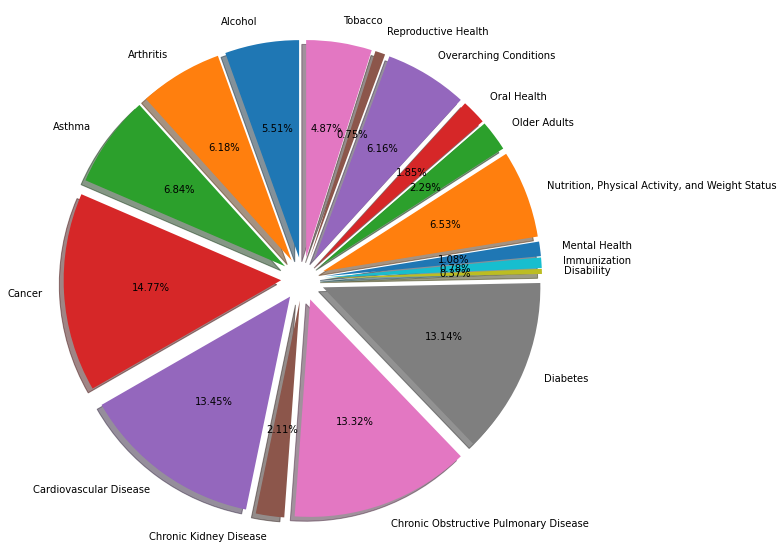

In [40]:
fig = plt.figure(figsize =(10,10))
plt.pie(df_group_by_disease_loc['LocationDesc'], labels = df_group_by_disease_loc.index,startangle=90, shadow=True,explode=((0.1,)*len(df_group_by_disease_loc['LocationDesc'])), autopct='%1.2f%%')
 
# show plot
plt.show()

### As per the above graph Cancer seems the most prevalent among all diseases

### Distribution of different diseases in a given year

<Figure size 800x480 with 0 Axes>

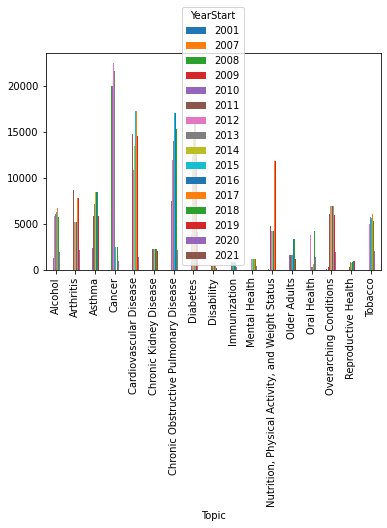

In [41]:
from matplotlib.pyplot import figure
figure(figsize = (10, 6), dpi = 80)
pd.crosstab(us_cdi_data_loc_merged_na_dropped['Topic'],us_cdi_data_loc_merged_na_dropped['YearStart']).plot.bar()

In [42]:
grp_by_year_disease = us_cdi_data_loc_merged_na_dropped.groupby(['Topic','YearStart'],as_index=False).count()

In [43]:
grp_by_year_disease

,Topic,YearStart,YearEnd,DataSource,Question,DataValueUnit,DataValueType,DataValue,DataValueAlt,DataValueFootnoteSymbol,...,StratificationCategory1,Stratification1,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,LocationAbbr,LocationDesc,GeoLocation
0,Alcohol,2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alcohol,2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Alcohol,2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Alcohol,2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Alcohol,2010,1282.0,1282.0,1282.0,873.0,1282.0,1282.0,1282.0,439.0,...,1282.0,1282.0,1282.0,1282.0,1282.0,1282.0,1282.0,1282.0,1282.0,1282.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,Tobacco,2017,6079.0,6079.0,6079.0,5917.0,6079.0,6079.0,6079.0,2303.0,...,6079.0,6079.0,6079.0,6079.0,6079.0,6079.0,6079.0,6079.0,6079.0,6079.0
268,Tobacco,2018,5291.0,5291.0,5291.0,5129.0,5291.0,5291.0,5291.0,1887.0,...,5291.0,5291.0,5291.0,5291.0,5291.0,5291.0,5291.0,5291.0,5291.0,5291.0
269,Tobacco,2019,6183.0,6183.0,6183.0,6021.0,6183.0,6183.0,6183.0,2307.0,...,6183.0,6183.0,6183.0,6183.0,6183.0,6183.0,6183.0,6183.0,6183.0,6183.0
270,Tobacco,2020,2077.0,2077.0,2077.0,1912.0,2077.0,2077.0,2077.0,708.0,...,2077.0,2077.0,2077.0,2077.0,2077.0,2077.0,2077.0,2077.0,2077.0,2077.0


In [44]:
sort_by_hosp_count = (us_cdi_data_loc_merged_na_dropped.groupby('LocationDesc'))['LocationDesc'].count().sort_values(ascending=False)

In [45]:
sort_by_hosp_count.head()

LocationDesc
Colorado    20469
Iowa        20455
Arkansas    20436
Florida     20363
Hawaii      20360
Name: LocationDesc, dtype: int64

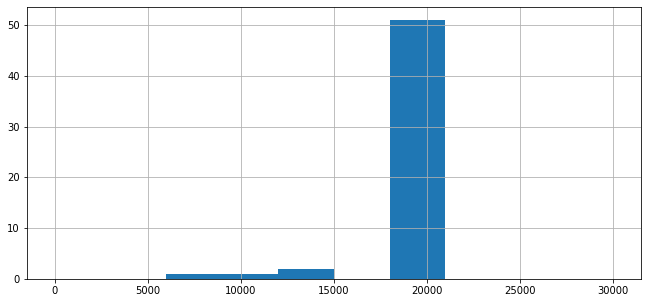

In [46]:
sort_by_hosp_count.hist(range=[0,30000], figsize=(11,5))                               

## By examining this specific data, we have discovered that:
## Cardiovascular disorders and cancer are the two most prevalent indicators of chronic diseases.
## Virgin Islands has the fewest hospital services, whereas Colorado has the most number of hospital services.
## While there were fewer instances of COPD between 2001 and 2021, cancer diagnoses sharply climbed throughout same time.